In [1]:
import numpy as np 
import pandas as pd
import tensorflow
from tensorflow.keras import models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('sonar.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [24]:
X = data.iloc[:,:60].values.astype(float)
y = data.iloc[:,60].values

In [25]:
#encoding our labels
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [26]:
#splitting our data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [27]:
#normalizing our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
#adding the input and first hidden layer
model = models.Sequential()
model.add(Dense(16,activation = 'relu',input_shape=(60,)))

#adding second hidden layer
model.add(Dense(16,activation = 'relu'))

#addng output layer
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
model.fit(X,y,batch_size = 64,epochs = 100)

Epoch 1/100
207/207 [==============================] - 2s 11ms/sample - loss: 0.7015 - acc: 0.5024
Epoch 2/100
207/207 [==============================] - 0s 261us/sample - loss: 0.6964 - acc: 0.5362
Epoch 3/100
207/207 [==============================] - 0s 222us/sample - loss: 0.6930 - acc: 0.5411
Epoch 4/100
207/207 [==============================] - 0s 483us/sample - loss: 0.6899 - acc: 0.5652
Epoch 5/100
207/207 [==============================] - 0s 169us/sample - loss: 0.6878 - acc: 0.5604
Epoch 6/100
207/207 [==============================] - 0s 280us/sample - loss: 0.6852 - acc: 0.5604
Epoch 7/100
207/207 [==============================] - 0s 266us/sample - loss: 0.6827 - acc: 0.5652
Epoch 8/100
207/207 [==============================] - 0s 473us/sample - loss: 0.6804 - acc: 0.5700
Epoch 9/100
207/207 [==============================] - 0s 454us/sample - loss: 0.6781 - acc: 0.5749
Epoch 10/100
207/207 [==============================] - 0s 251us/sample - loss: 0.6764 - acc: 0.5700


207/207 [==============================] - 0s 338us/sample - loss: 0.3797 - acc: 0.8406
Epoch 82/100
207/207 [==============================] - 0s 319us/sample - loss: 0.3788 - acc: 0.8406
Epoch 83/100
207/207 [==============================] - 0s 184us/sample - loss: 0.3748 - acc: 0.8357
Epoch 84/100
207/207 [==============================] - 0s 217us/sample - loss: 0.3748 - acc: 0.8406
Epoch 85/100
207/207 [==============================] - 0s 266us/sample - loss: 0.3760 - acc: 0.8213
Epoch 86/100
207/207 [==============================] - 0s 213us/sample - loss: 0.3710 - acc: 0.8357
Epoch 87/100
207/207 [==============================] - 0s 237us/sample - loss: 0.3686 - acc: 0.8406
Epoch 88/100
207/207 [==============================] - 0s 155us/sample - loss: 0.3660 - acc: 0.8406
Epoch 89/100
207/207 [==============================] - 0s 309us/sample - loss: 0.3643 - acc: 0.8454
Epoch 90/100
207/207 [==============================] - 0s 242us/sample - loss: 0.3640 - acc: 0.8502
Epo

In [34]:
#predicting the test results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

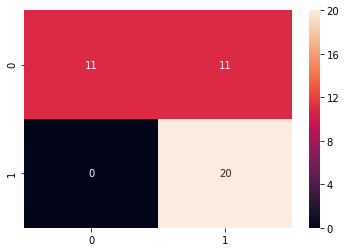

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [38]:
a = (11+20)/(11+11+20)
print('the accuracy is ,a)

0.7380952380952381